In [1]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Import the packages
%matplotlib inline

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

# To Scale our data
from sklearn.preprocessing import scale

# To perform KMeans clustering 
from sklearn.cluster import KMeans

# To perform Hierarchical clustering
from scipy.cluster.hierarchy import dendrogram, linkage, cut_tree

## Task 1: Reading and Inspection

-  ### Subtask 1.1: Import and read

Import and read the Country dataset.

In [3]:
countries_raw_df = pd.read_csv('Country-data.csv')
countries_raw_df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


-  ### Subtask 1.2: Inspect the dataframe

Inspect the dataframe's columns, shapes, variable types etc.

In [4]:
countries_raw_df.shape

(167, 10)

In [5]:
countries_raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
country       167 non-null object
child_mort    167 non-null float64
exports       167 non-null float64
health        167 non-null float64
imports       167 non-null float64
income        167 non-null int64
inflation     167 non-null float64
life_expec    167 non-null float64
total_fer     167 non-null float64
gdpp          167 non-null int64
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [6]:
countries_raw_df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


## Task 2: Cleaning the Data

-  ### Subtask 2.1: Converting %age values to actual numbers

Convert the dataframe's exports, health and imports columns %age values to actual numbers.

In [7]:
# Converting exports column
countries_raw_df['exports'] = (countries_raw_df['exports']/100)*countries_raw_df['gdpp']

In [8]:
# Converting health column
countries_raw_df['health'] = (countries_raw_df['health']/100)*countries_raw_df['gdpp']

In [9]:
# Converting imports column
countries_raw_df['imports'] = (countries_raw_df['imports']/100)*countries_raw_df['gdpp']

In [10]:
countries_raw_df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200


-  ### Subtask 2.2: Inspect Null values

In [11]:
countries_raw_df.isnull().sum(axis = 0)

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

## Task 3: Visualising the Data

We'll visualise our data using `matplotlib` and `seaborn`.

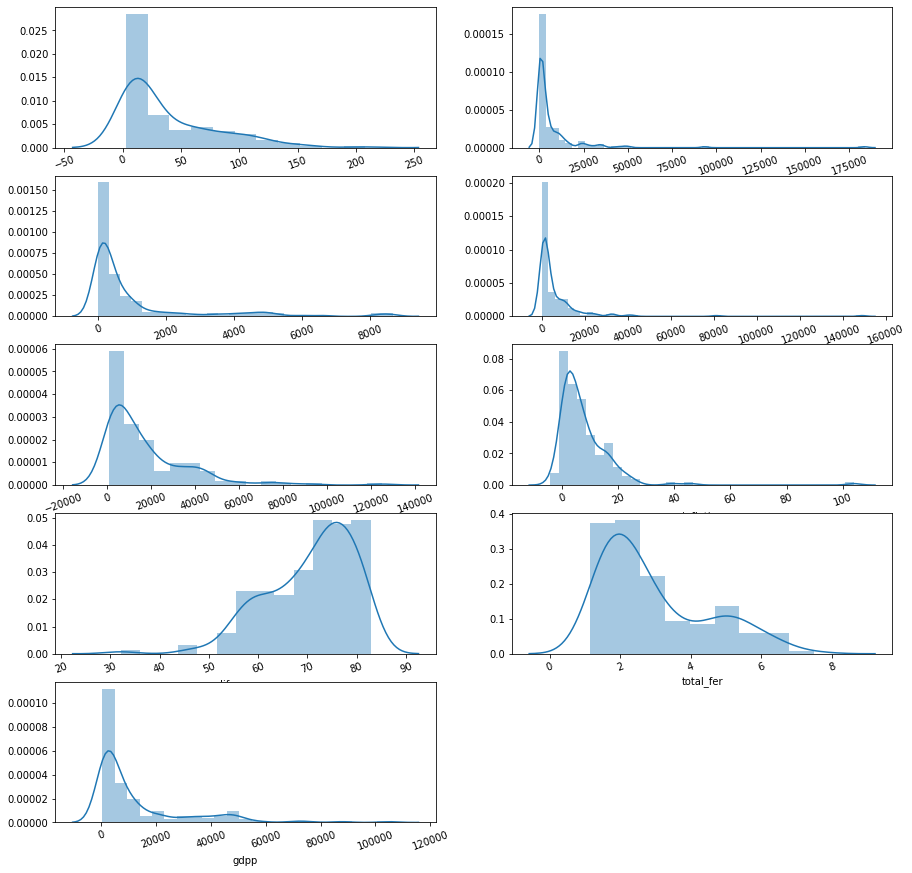

In [12]:
plt.figure(figsize=(15,15))
features = ['child_mort', 'exports', 'health', 'imports', 'income', 'inflation', 'life_expec', 'total_fer', 'gdpp']
for i in enumerate(features):
    ax = plt.subplot(5, 2, i[0]+1)
    sns.distplot(countries_raw_df[i[1]])
    plt.xticks(rotation = 20)

## Task 4: Data preparation for clustering

-  ### Subtask 4.1: Outliers Treatment

In [13]:
countries_raw_df.columns

Index(['country', 'child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

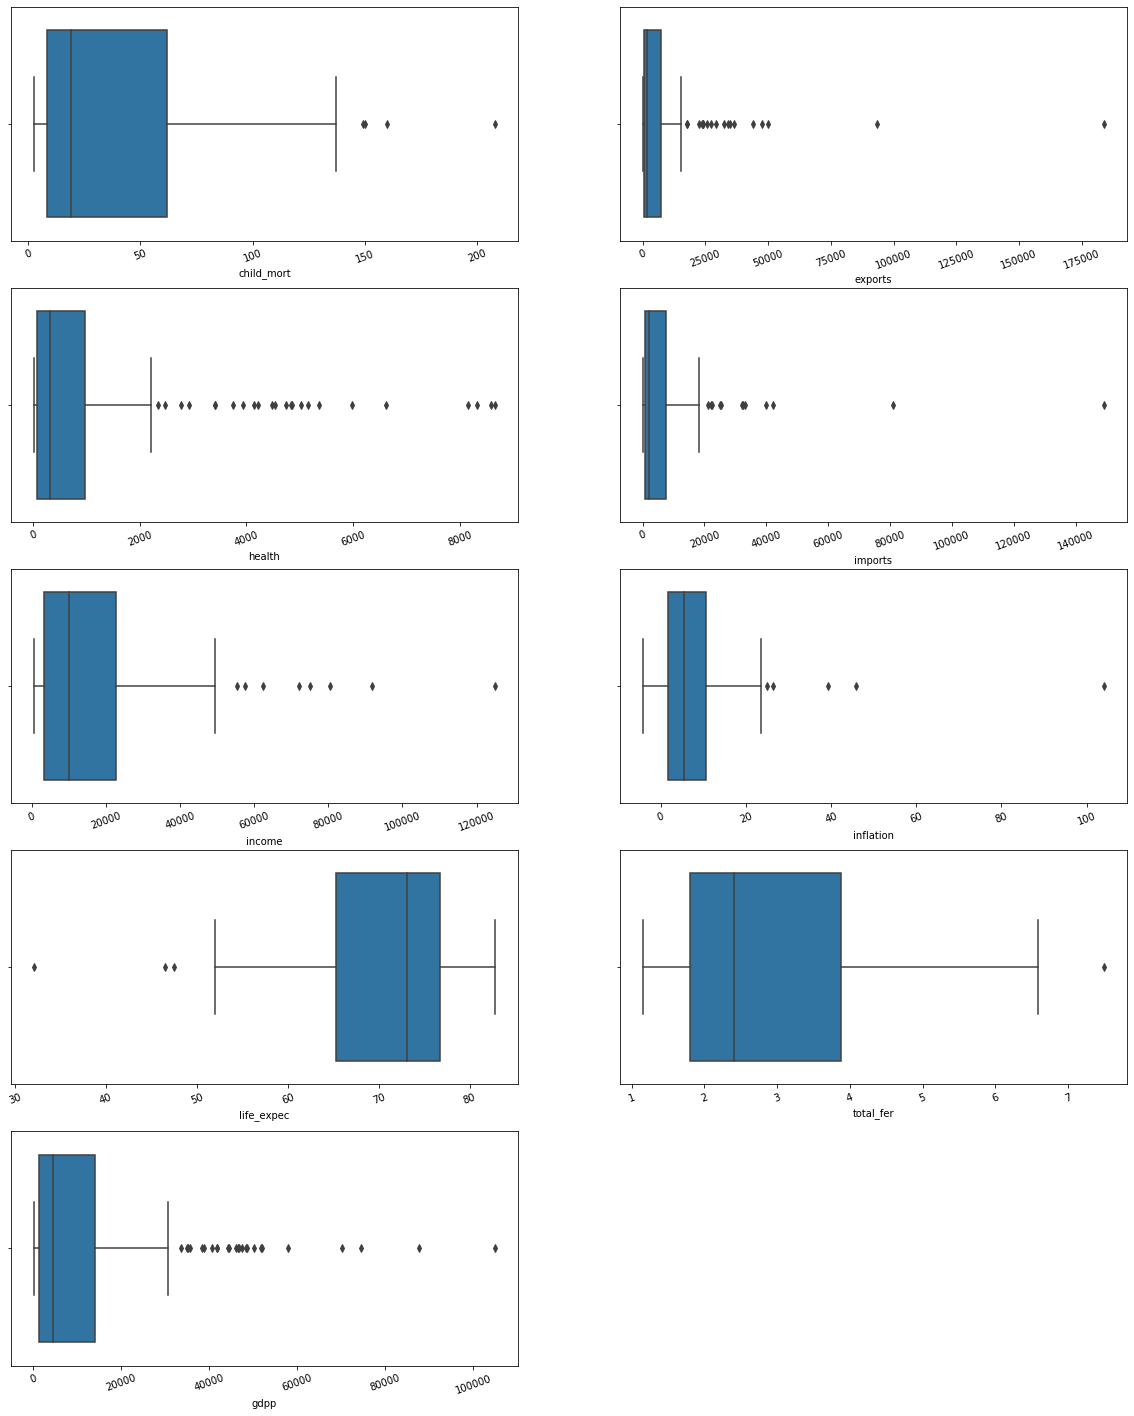

In [14]:
plt.figure(figsize=(20,25))
features = ['child_mort', 'exports', 'health', 'imports', 'income', 'inflation', 'life_expec', 'total_fer', 'gdpp']
for i in enumerate(features): 
    ax = plt.subplot(5, 2, i[0]+1)
    sns.boxplot(x=i[1], data=countries_raw_df)
    plt.xticks(rotation = 20)

In [15]:
# Capping of data to treat outliers
features = ['child_mort', 'exports', 'health', 'imports', 'income', 'inflation', 'life_expec', 'total_fer', 'gdpp']
for feature in features:
    countries_raw_df[feature] = np.where(countries_raw_df[feature] <countries_raw_df[feature].quantile(0.01), countries_raw_df[feature].quantile(0.01),countries_raw_df[feature])
    countries_raw_df[feature] = np.where(countries_raw_df[feature] >countries_raw_df[feature].quantile(0.99), countries_raw_df[feature].quantile(0.99),countries_raw_df[feature])

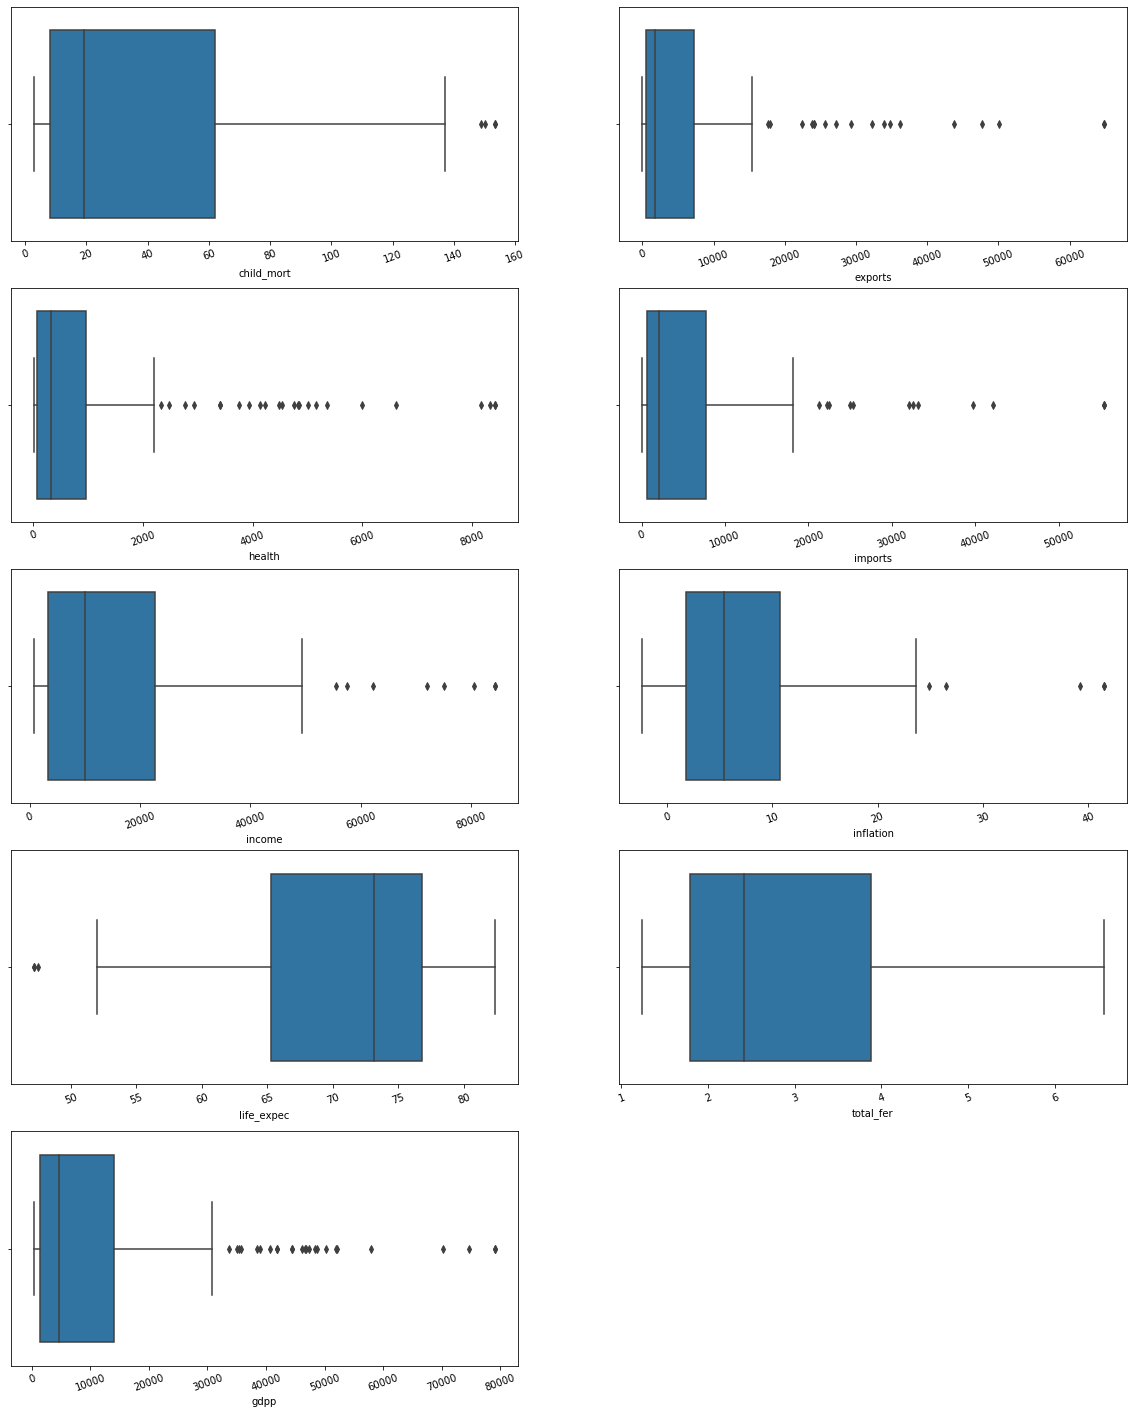

In [16]:
# Again checking the boxplot for variables
plt.figure(figsize=(20,25))
features = ['child_mort', 'exports', 'health', 'imports', 'income', 'inflation', 'life_expec', 'total_fer', 'gdpp']
for i in enumerate(features): 
    ax = plt.subplot(5, 2, i[0]+1)
    sns.boxplot(x=i[1], data=countries_raw_df)
    plt.xticks(rotation = 20)

In [17]:
# Checking the countries data after outlier treatment
countries_raw_df.shape

(167, 10)

-  ### Subtask 4.2: Hopkins Check

In [18]:
#Calculating the Hopkins statistic
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [19]:
hopkins(countries_raw_df.drop('country', axis = 1))

0.9411494258416905

-  ### Subtask 4.3: Scaling the data

In [20]:
# Now for perfroming clustering, we need to drop the 'country' column, Let's drop it
df1 = countries_raw_df.drop('country', axis = 1)

In [21]:
df1.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2,55.30,41.9174,248.297,1610.0,9.44,56.2,5.82,553.0
1,16.6,1145.20,267.8950,1987.740,9930.0,4.49,76.3,1.65,4090.0
2,27.3,1712.64,185.9820,1400.440,12900.0,16.10,76.5,2.89,4460.0
3,119.0,2199.19,100.6050,1514.370,5900.0,22.40,60.1,6.16,3530.0
4,10.3,5551.00,735.6600,7185.800,19100.0,1.44,76.8,2.13,12200.0


In [22]:
from sklearn.preprocessing import StandardScaler
standard_scaler = StandardScaler()
df1 = standard_scaler.fit_transform(df1)

In [23]:
df1 = pd.DataFrame(df1)
df1.columns = ['child_mort', 'exports', 'health', 'imports', 'income', 'inflation', 'life_expec', 'total_fer', 'gdpp']
df1.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.344012,-0.569638,-0.566983,-0.598844,-0.851772,0.263649,-1.693799,1.926928,-0.702314
1,-0.547543,-0.473873,-0.440417,-0.413679,-0.387025,-0.375251,0.663053,-0.865911,-0.498775
2,-0.272548,-0.424015,-0.486295,-0.476198,-0.221124,1.123260,0.686504,-0.035427,-0.477483
3,2.084186,-0.381264,-0.534113,-0.464070,-0.612136,1.936405,-1.236499,2.154642,-0.531000
4,-0.709457,-0.086754,-0.178431,0.139659,0.125202,-0.768917,0.721681,-0.544433,-0.032079


## Task 5: Clustering

-  ### Subtask 5.1: K-MEANS Clustering

-  #### Subtask 5.1.1: Choose K using both elbow and silhouette score

    1. Look at the silhouette score plot and choose the optimal number of cluster


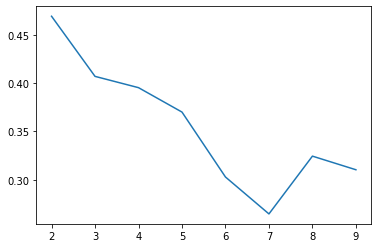

In [24]:
#First we'll do the silhouette score analysis
from sklearn.metrics import silhouette_score
ss = []
for k in range(2,10):
    kmeans = KMeans(n_clusters = k).fit(df1)
    ss.append([k, silhouette_score(df1, kmeans.labels_)])
    
plt.plot(pd.DataFrame(ss)[0], pd.DataFrame(ss)[1]);

    2. Look at the Elbow Curve plot and choose the optimal number of cluster

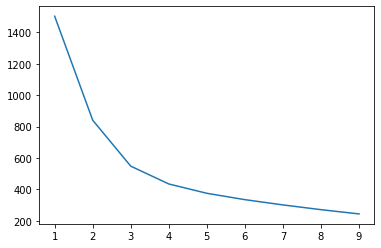

In [25]:
#Now let's proceed to the elbow curve method
ssd = []
for k in list(range(1,10)):
    model = KMeans(n_clusters = k, max_iter = 50).fit(df1)
    ssd.append([k, model.inertia_])
    
plt.plot(pd.DataFrame(ssd)[0], pd.DataFrame(ssd)[1]);

-  #### Subtask 5.1.2: KMeans with the K the we have choosed

In [26]:
#Let's perform K means using K=3
kmean = KMeans(n_clusters = 3, max_iter = 50, random_state = 50)
kmean.fit(df1)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=50, tol=0.0001, verbose=0)

In [27]:
## Let's make a copy of our original data before using it for analysis
countries_raw_df_org = countries_raw_df.copy()

In [28]:
countries_raw_df.columns

Index(['country', 'child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

In [29]:
# Let's add the cluster Ids to the original data 
df_km = pd.concat([countries_raw_df.reset_index().drop('index', axis = 1), pd.Series(kmean.labels_)], axis = 1)
df_km.columns = ['country', 'child_mort', 'exports', 'health', 'imports', 'income', 'inflation', 'life_expec', 'total_fer', 'gdpp', 'cluster_id']
df_km.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id
0,Afghanistan,90.2,55.30,41.9174,248.297,1610.0,9.44,56.2,5.82,553.0,1
1,Albania,16.6,1145.20,267.8950,1987.740,9930.0,4.49,76.3,1.65,4090.0,2
2,Algeria,27.3,1712.64,185.9820,1400.440,12900.0,16.10,76.5,2.89,4460.0,2
3,Angola,119.0,2199.19,100.6050,1514.370,5900.0,22.40,60.1,6.16,3530.0,1
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100.0,1.44,76.8,2.13,12200.0,2


In [30]:
# Cross-check
df_km.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
cluster_id    0
dtype: int64

In [31]:
# Check the count of observation per cluster
df_km['cluster_id'].value_counts()

2    90
1    48
0    29
Name: cluster_id, dtype: int64

-  #### Subtask 5.1.3: Visualize the clusters

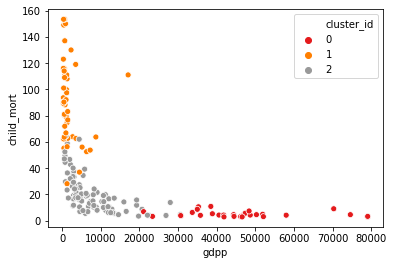

In [32]:
# Plot the Cluster with respect to the clusters obtained
sns.scatterplot(x = 'gdpp', y = 'child_mort', hue ='cluster_id', legend = 'full', data = df_km, palette='Set1')

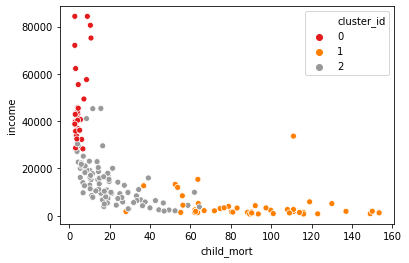

In [33]:
sns.scatterplot(x = 'child_mort', y = 'income', hue ='cluster_id', legend = 'full', data = df_km, palette='Set1')

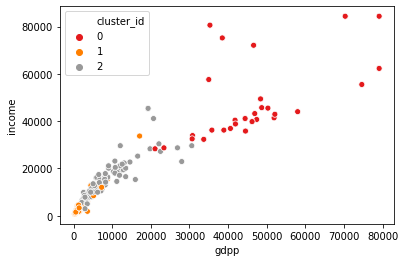

In [34]:
sns.scatterplot(x = 'gdpp', y = 'income', hue ='cluster_id', legend = 'full', data = df_km, palette='Set1')

-  #### Subtask 5.1.4: Cluster Profiling

In [35]:
df_km.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id
0,Afghanistan,90.2,55.30,41.9174,248.297,1610.0,9.44,56.2,5.82,553.0,1
1,Albania,16.6,1145.20,267.8950,1987.740,9930.0,4.49,76.3,1.65,4090.0,2
2,Algeria,27.3,1712.64,185.9820,1400.440,12900.0,16.10,76.5,2.89,4460.0,2
3,Angola,119.0,2199.19,100.6050,1514.370,5900.0,22.40,60.1,6.16,3530.0,1
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100.0,1.44,76.8,2.13,12200.0,2


In [36]:
df_km.groupby('cluster_id').mean()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
cluster_id,,,,,,,,,
0,4.989655,25405.359310,4239.330028,21316.695862,47784.413793,2.906731,80.453103,1.757352,46068.137931
1,90.335417,879.097657,114.939003,827.327888,3901.010000,10.608604,59.567083,4.972233,1911.400833
2,20.547778,3477.250726,528.894338,3589.291996,13804.333333,7.131624,73.393333,2.242591,7808.577778


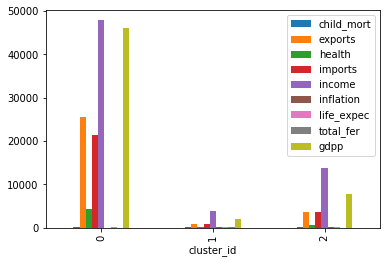

In [37]:
df_km.groupby('cluster_id').mean().plot(kind = 'bar')

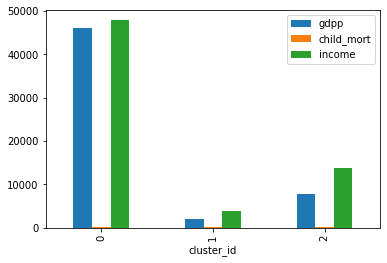

In [38]:
df_km[['gdpp', 'child_mort', 'income', 'cluster_id']].groupby('cluster_id').mean().plot(kind = 'bar')

-  #### Subtask 5.1.5: Finding the observations that belong to certain cluster

In [39]:
#Let's use the concept of binning
df_km[df_km['cluster_id']==1]['country']

0                   Afghanistan
3                        Angola
17                        Benin
21                     Botswana
25                 Burkina Faso
26                      Burundi
28                     Cameroon
31     Central African Republic
32                         Chad
36                      Comoros
37             Congo, Dem. Rep.
38                  Congo, Rep.
40                Cote d'Ivoire
49            Equatorial Guinea
50                      Eritrea
55                        Gabon
56                       Gambia
59                        Ghana
63                       Guinea
64                Guinea-Bissau
66                        Haiti
72                         Iraq
80                        Kenya
81                     Kiribati
84                          Lao
87                      Lesotho
88                      Liberia
93                   Madagascar
94                       Malawi
97                         Mali
99                   Mauritania
106     

In [40]:
df_km[df_km['cluster_id']==1].sort_values(by=['gdpp', 'child_mort', 'income'], ascending=[True, True, True])

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id
88,Liberia,89.3,62.457000,38.586000,302.80200,742.24,5.470,60.80,5.0200,331.62,1
26,Burundi,93.6,22.243716,26.796000,104.90964,764.00,12.300,57.70,6.2600,331.62,1
37,"Congo, Dem. Rep.",116.0,137.274000,26.419400,165.66400,742.24,20.800,57.50,6.5400,334.00,1
112,Niger,123.0,77.256000,17.956800,170.86800,814.00,2.550,58.80,6.5636,348.00,1
132,Sierra Leone,153.4,67.032000,52.269000,137.65500,1220.00,17.200,55.00,5.2000,399.00,1
93,Madagascar,62.2,103.250000,17.009362,177.59000,1390.00,8.790,60.80,4.6000,413.00,1
106,Mozambique,101.0,131.985000,21.829900,193.57800,918.00,7.640,54.50,5.5600,419.00,1
31,Central African Republic,149.0,52.628000,17.750800,118.19000,888.00,2.010,47.50,5.2100,446.00,1
94,Malawi,90.5,104.652000,30.248100,160.19100,1030.00,12.100,53.10,5.3100,459.00,1
50,Eritrea,55.2,23.087800,17.009362,112.30600,1420.00,11.600,61.70,4.6100,482.00,1


In [41]:
# 5 countries which are in direst need of aid from the analysis work that is performd above
df_km[df_km['cluster_id']==1].sort_values(by=['gdpp', 'child_mort', 'income'], ascending=[True, True, True]).head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id
88,Liberia,89.3,62.457000,38.5860,302.80200,742.24,5.47,60.8,5.0200,331.62,1
26,Burundi,93.6,22.243716,26.7960,104.90964,764.00,12.30,57.7,6.2600,331.62,1
37,"Congo, Dem. Rep.",116.0,137.274000,26.4194,165.66400,742.24,20.80,57.5,6.5400,334.00,1
112,Niger,123.0,77.256000,17.9568,170.86800,814.00,2.55,58.8,6.5636,348.00,1
132,Sierra Leone,153.4,67.032000,52.2690,137.65500,1220.00,17.20,55.0,5.2000,399.00,1


-  ### Subtask 5.2: Hierarchical Clustering

    -  #### Subtask 5.2.1: Single and Complete Linkage

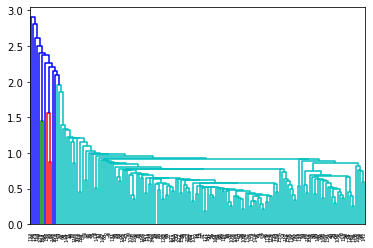

In [42]:
# Single Linkage
mergings = linkage(df1, method='single', metric='euclidean')
dendrogram(mergings)
plt.show()

<function matplotlib.pyplot.show(*args, **kw)>

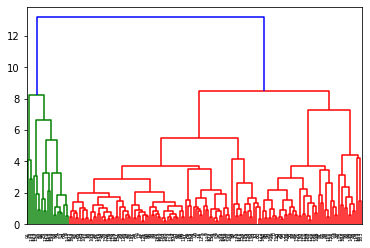

In [43]:
# Complete Linkage
mergings = linkage(df1, method='complete', metric='euclidean')
dendrogram(mergings)
plt.show

   -  #### Subtask 5.2.2: Chossing the method based on above results

In [44]:
# Taking 2 clusters
cluster_labels = cut_tree(mergings, n_clusters=2).reshape(-1, )
cluster_labels

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0])

In [45]:
# Assign cluster labels
df_km['cluster_labels'] = cluster_labels
df_km.drop('cluster_id', axis = 1).head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_labels
0,Afghanistan,90.2,55.30,41.9174,248.297,1610.0,9.44,56.2,5.82,553.0,0
1,Albania,16.6,1145.20,267.8950,1987.740,9930.0,4.49,76.3,1.65,4090.0,0
2,Algeria,27.3,1712.64,185.9820,1400.440,12900.0,16.10,76.5,2.89,4460.0,0
3,Angola,119.0,2199.19,100.6050,1514.370,5900.0,22.40,60.1,6.16,3530.0,0
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100.0,1.44,76.8,2.13,12200.0,0


In [46]:
# Check the count of observation per cluster
df_km['cluster_labels'].value_counts()

0    146
1     21
Name: cluster_labels, dtype: int64

-  #### Subtask 5.2.3: Visualize the clusters

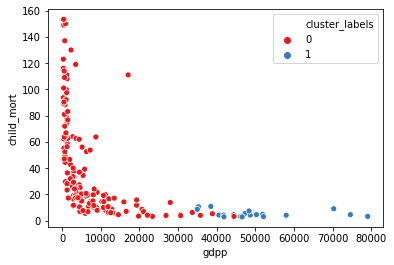

In [47]:
# Plot the Cluster with respect to the clusters obtained
sns.scatterplot(x = 'gdpp', y = 'child_mort', hue ='cluster_labels', legend = 'full', data = df_km, palette='Set1')

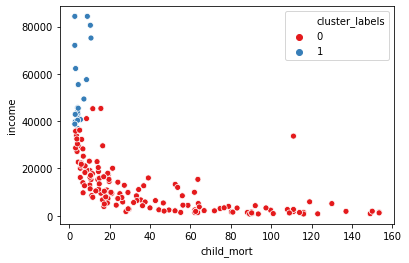

In [48]:
sns.scatterplot(x = 'child_mort', y = 'income', hue ='cluster_labels', legend = 'full', data = df_km, palette='Set1')

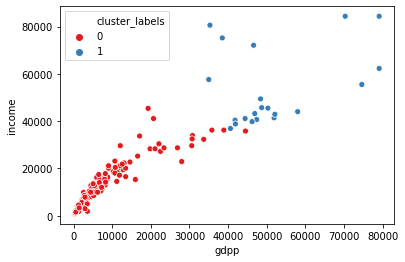

In [49]:
sns.scatterplot(x = 'gdpp', y = 'income', hue ='cluster_labels', legend = 'full', data = df_km, palette='Set1')

   -  #### Subtask 5.2.4: Cluster Profiling

In [50]:
df_km.drop('cluster_id', axis = 1).groupby('cluster_labels').mean()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
cluster_labels,,,,,,,,,
0,42.612329,3168.808581,525.346867,3240.445331,11599.578630,7.943775,69.256781,3.103838,7215.200274
1,5.176190,29964.696190,4731.309086,24182.246667,53421.333333,3.598248,80.298571,1.823962,51289.333333


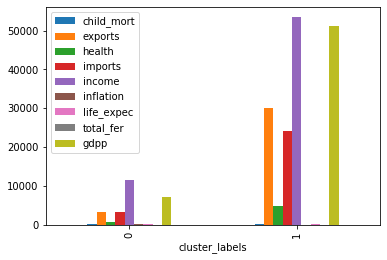

In [51]:
df_km.drop('cluster_id', axis = 1).groupby('cluster_labels').mean().plot(kind = 'bar')

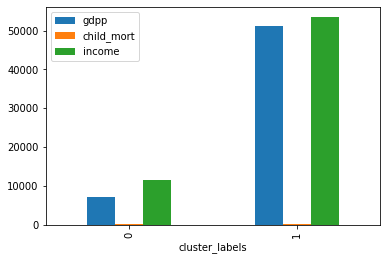

In [52]:
df_km.drop('cluster_id', axis = 1)[['gdpp', 'child_mort', 'income', 'cluster_labels']].groupby('cluster_labels').mean().plot(kind = 'bar')

-  #### Subtask 5.2.5: Finding the observations that belong to certain cluster

In [53]:
#Let's use the concept of binning
df_km.drop('cluster_id', axis = 1)[df_km['cluster_labels']==0]['country']

0              Afghanistan
1                  Albania
2                  Algeria
3                   Angola
4      Antigua and Barbuda
              ...         
162                Vanuatu
163              Venezuela
164                Vietnam
165                  Yemen
166                 Zambia
Name: country, Length: 146, dtype: object

In [54]:
df_km.drop('cluster_id', axis = 1)[df_km['cluster_labels']==0].sort_values(by=['gdpp', 'child_mort', 'income'], ascending=[True, True, True])

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_labels
88,Liberia,89.3,62.457000,38.5860,302.80200,742.24,5.470,60.80,5.0200,331.62,0
26,Burundi,93.6,22.243716,26.7960,104.90964,764.00,12.300,57.70,6.2600,331.62,0
37,"Congo, Dem. Rep.",116.0,137.274000,26.4194,165.66400,742.24,20.800,57.50,6.5400,334.00,0
112,Niger,123.0,77.256000,17.9568,170.86800,814.00,2.550,58.80,6.5636,348.00,0
132,Sierra Leone,153.4,67.032000,52.2690,137.65500,1220.00,17.200,55.00,5.2000,399.00,0
...,...,...,...,...,...,...,...,...,...,...,...
42,Cyprus,3.6,15461.600000,1838.7600,17710.00000,33900.00,2.010,79.90,1.4200,30800.00,0
111,New Zealand,6.2,10211.100000,3403.7000,9436.00000,32300.00,3.730,80.90,2.1700,33700.00,0
75,Italy,4.0,9021.600000,3411.7400,9737.60000,36200.00,0.319,81.70,1.4600,35800.00,0
158,United Kingdom,5.2,10969.800000,3749.9600,11981.20000,36200.00,1.570,80.30,1.9200,38900.00,0


In [55]:
# 5 countries which are in direst need of aid from the analysis work that is performd above
df_km.drop('cluster_id', axis = 1)[df_km['cluster_labels']==0].sort_values(by=['gdpp', 'child_mort', 'income'], ascending=[True, True, True]).head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_labels
88,Liberia,89.3,62.457000,38.5860,302.80200,742.24,5.47,60.8,5.0200,331.62,0
26,Burundi,93.6,22.243716,26.7960,104.90964,764.00,12.30,57.7,6.2600,331.62,0
37,"Congo, Dem. Rep.",116.0,137.274000,26.4194,165.66400,742.24,20.80,57.5,6.5400,334.00,0
112,Niger,123.0,77.256000,17.9568,170.86800,814.00,2.55,58.8,6.5636,348.00,0
132,Sierra Leone,153.4,67.032000,52.2690,137.65500,1220.00,17.20,55.0,5.2000,399.00,0


### Final list of countries

 - 5 countries which are in direst need of aid

    1. Liberia
    2. Burundi
    3. Congo, Dem. Rep.
    4. Niger
    5. Sierra Leone